# The Sparks Foundation
# Data Science & Business Analytics Task Internship

## Task 1 - Prediction using Supervised ML
### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Author: Mohit Tukaram Kumbhare
##Batch January 2022

In [3]:
# Importing required library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing DataSet
from sklearn import datasets
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25



# Analyse Data

In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


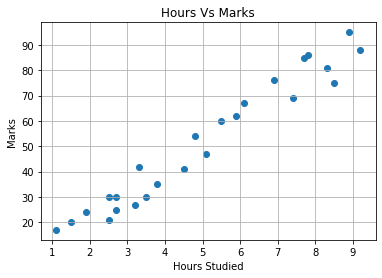

In [8]:
x = df['Hours']
y = df['Scores']
plt.figure()
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.title('Hours Vs Marks')
plt.scatter(x,y)
plt.grid()
plt.show()

#Feature And Target Selection

In [9]:
X = df.drop('Scores', axis = 1)
y = df['Scores']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

# Training the Algorithm

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1, test_size = 0.3)

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#Making Predictions And Evaluation

In [13]:
y_pred = lr.predict(X_test)
predicted_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted_data

,Actual,Predicted
14,17,9.939530
13,42,32.843201
17,24,18.268138
3,75,86.979152
21,54,48.459341
10,85,78.650544
18,67,61.993329
19,69,75.527316


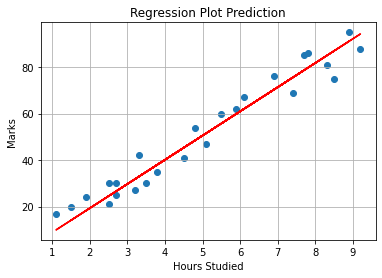

In [14]:
x = df['Hours']
y = df['Scores']
pred_y = x * lr.coef_ + lr.intercept_
plt.figure()
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.title('Regression Plot Prediction')
plt.scatter(x,y)
plt.plot(x, pred_y, color = 'red')
plt.grid()
plt.show()

In [15]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f'''
      Mean Squared Error: {mse},
      Mean Absolute Error: {mae},
      r2 Score: {r2}
      ''')


      Mean Squared Error: 56.092330905646705,
      Mean Absolute Error: 7.169048271425507,
      r2 Score: 0.8933827573294114
      


In [17]:
# Predict Marks For 9.25 Hours
time = 9.25
predict = lr.predict(np.array([time]).reshape(1,-1))

In [18]:
print(f'Marks Obtained for Predicted time {time} is {predict[0]}')

Marks Obtained for Predicted time 9.25 is 94.78722212956563
